<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#вывод-предобработки-данных" data-toc-modified-id="вывод-предобработки-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>вывод предобработки данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# Импортируем библиотеки 
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Читаем фойл
df = pd.read_csv('real_estate_data.csv')
# Выведем 5 строк для визуального анализа
df.head()
# Смотрим общую информацию
#df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Данные были склеины, разделили их знаком табуляции '\t'. Имеем 22 столбца и 23699 строк с разными типами данных.

**Описание данных:** 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

- В столбцах имеются пропуски.
- Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


## Предобработка данных

In [2]:
# проверяю название столбцов
df.columns
# подсчёт пропусков
df.isna().sum()
#В сумме у нас 101441 пропусков, в разных столбцах необходмо выставить среднее значение, а в остальных проставить 0

df['ceiling_height'].isna().sum() # сумма  nan в ceiling_height 9160 значений


df['ceiling_height']=df['ceiling_height'].astype('float64')# перевели в вещественный тип
#mean_height=data.groupby('locality_name')['ceiling_height'].transform('mean') # сгруппировали высоту потолков в зависимости от района
median_height=df['ceiling_height'].median()
df['ceiling_height'].fillna(median_height,inplace=True)
# записали в пустые места высоты потолка средние значения высот потолков по району
#data['ceiling_height'].mean() #средняя высота потолка из всей выборки


df['ceiling_height'].isna().sum() # сумма  nan в ceiling_height 0

df['living_area']=df['living_area'].astype('float64')  #меняем тип данных на вещественный для living_area и last_price
df['last_price']=df['last_price'].astype('float64')

df['one_m_price']=df['last_price']/df['living_area']# Посчитали и сделали столбец со стоимостью за м2

grouped_price=df.groupby('locality_name')['one_m_price'].transform('mean') # группируем по району
nan=df.groupby('locality_name')['one_m_price'].mean()


In [3]:
grouped_price.isna().sum()

66

In [4]:
df['one_m_price'].fillna(grouped_price,inplace=True)# Заполняем пропуски медианным значением стоимости 1 м.кв в зависимости от район

In [5]:
df.dropna(subset=['one_m_price'],inplace=True) # удаляем если остались  nan
df['one_m_price'].isna().sum()

0

In [6]:
df['living_area'].isna().sum()
# 1181 значений
df['living_area'].fillna(df['last_price']/df['one_m_price'],inplace=True) # заполняем пропуски площади поделив цену кв на стоимость 1 м.кв.
df['living_area'].isna().sum()


0

In [7]:
df['balcony'].isnull().sum()
# 11498 значений
df['balcony']=df['balcony'].fillna(0) # заполняем пропуски балкона 0- нет балкона
df['balcony']=df['balcony'].astype('float64')
df['balcony']=df['balcony'].astype('int64')
df['balcony'].isnull().sum()

0

In [8]:
# Аппартаменты имя меняем на 0
df['is_apartment']=df['is_apartment'].fillna(0)
df['locality_name']=df['locality_name'].fillna(0)

In [9]:
df['floors_total']=df['floors_total'].fillna(df['floors_total'].mean())#заполняем медианой
df['kitchen_area']=df['kitchen_area'].fillna(df['kitchen_area'].median())#заполняем медианой


In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5526
cityCenters_nearest      5503
parks_around3000         5502
parks_nearest           15599
ponds_around3000         5502
ponds_nearest           14569
days_exposition          3179
one_m_price                 0
dtype: int64

In [11]:

## Тип данных
## В таблице есть стобцы,где имеется тим данных float , заменим на тип данных (int) с помощью astype()
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
## Обработка дубликаов
#поиск дубликатов
df.duplicated().sum()
df.duplicated().value_counts()
# Дубликаты не обнаружены.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23677 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23677 non-null  int64  
 1   last_price            23677 non-null  int32  
 2   total_area            23677 non-null  float64
 3   first_day_exposition  23677 non-null  object 
 4   rooms                 23677 non-null  int64  
 5   ceiling_height        23677 non-null  float64
 6   floors_total          23677 non-null  int32  
 7   living_area           23677 non-null  float64
 8   floor                 23677 non-null  int64  
 9   is_apartment          23677 non-null  object 
 10  studio                23677 non-null  bool   
 11  open_plan             23677 non-null  bool   
 12  kitchen_area          23677 non-null  float64
 13  balcony               23677 non-null  int64  
 14  locality_name         23677 non-null  object 
 15  airports_nearest   

### вывод предобработки данных
Нашли и заменили проупски в столбцах, так же поменяли тип данных, для корректного расчёта в будущем.


## Расчёты и добавление результатов в таблицу

In [12]:
df.head()
#  Считаем цену квадратного метра разделим last_price на total_price
df['one_m_price'] = df['last_price'] / df['total_area']
#  Приводим в тип значения int
df['one_m_price'] = df['one_m_price'].astype('int')    
#проверка
df.head()


# Посчитайте и добавьте в таблицу день недели, месяц и год публикации объявления
#преобразуем их в дату и время, используя to_datetime, а затем вызовем атрибут dt.date, чтобы получить только часть даты:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')#перевожу в формат даты
df['first_day_exposition']=df['first_day_exposition'].dt.round('1D') # округляю до дня

df['week_day']=df['first_day_exposition'].dt.weekday #создаю столбец с днем недели
df['month']=df['first_day_exposition'].dt.month #создаю столбец с месяцем
df['year']=df['first_day_exposition'].dt.year #создаю столбец с годом

#Посчитаем и добавим в таблицу этаж квартиры; варианты — первый, последний, другой
# Категоризируем этажи в 3 категории (первый,последний и другой)
def flat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
# #Создаём новый столбец с категорией этожи
df['floor_category'] = df.apply(flat_floor, axis=1)
df.floor_category.value_counts() 


# # #Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['liv_ar_vr_tot_ar'] = df['living_area'] / df['total_area'] 
df['kit_vr_total'] = df['kitchen_area'] / df['total_area']
df.head()

# Выведем категории площади квартиры(эконом,стандарт,комфорт,престиж)
df['total_area'].min()
df['total_area'].max()
df['total_area'].mean()
# Узнали что минмальная площадь кв 12м а максимальная 900м. среднее 60м
def area(row):
    if row['total_area'] <= 38:
        return 'эконом'
    if 39 <= row['total_area'] <= 60:
        return 'стандарт'
    if 61 <= row['total_area'] <= 100:
        return 'комфорт'
    return 'престиж'
# #Создаём новый столбец с категорией кватратуры
df['area_cat'] = df.apply(area, axis=1)
df.area_cat.value_counts()

# Выведем категории цены квартиры(дешевая,средняя,дорогая и элитная)
df['last_price'].mean()
df['last_price'].min()
df['last_price'].max()

# Узнали что цена кв 12т.р. а максимальная 763млн. среднее 6,54млн
def price(row):
    if row['last_price'] <= 3000000:
        return 'дешевая'
    if 3000001 <= row['last_price'] <= 6000000:
        return 'средняя'
    if 6000001 <= row['last_price'] <= 12000000:
        return 'дорогая'
    return 'элитная'
#Создаём новый столбец с категорией кватратуры
df['price_cat'] = df.apply(price, axis=1)
df.price_cat.value_counts()

#Выведем категории кол-ва комнат(дешевая,средняя,дорогая и элитная)
df['rooms'].mean()
df['rooms'].min()
df['rooms'].max()
#Узнали что  максимальная 19 комнат, среднее 2 ком.
def room(row):
    if row['rooms'] <= 2:
        return 'малокомнатная'
    if 3 <= row['rooms'] <= 5:
        return 'многокомнатная'
    return 'бизнесс-класс'
#Создаём новый столбец с категорией кватратуры
df['rooms_cat'] = df.apply(room, axis=1)
df.rooms_cat.value_counts()

# Высота потолков есть несколько особенностей в качестве квартиры по 1м высоты и 100м. 
df['ceiling_height'].mean()
df['ceiling_height'].min()
df['ceiling_height'].max()

df['year']


0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23677, dtype: int64

## Исследовательский анализ данных

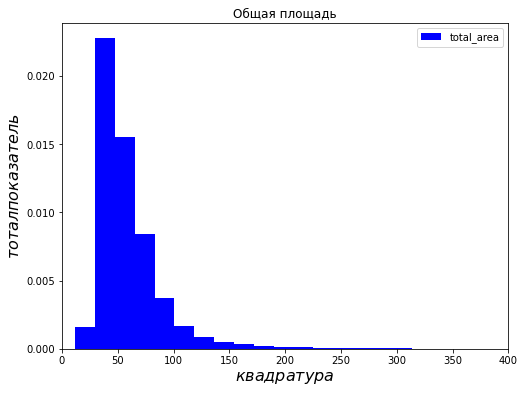

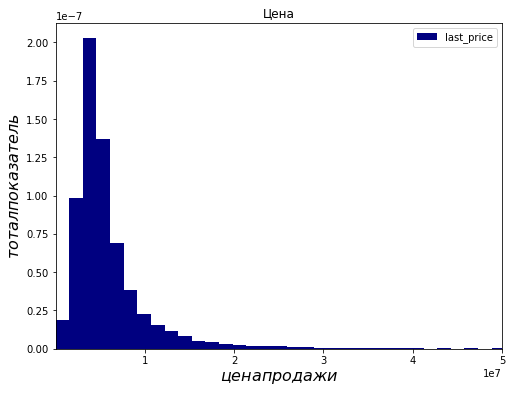

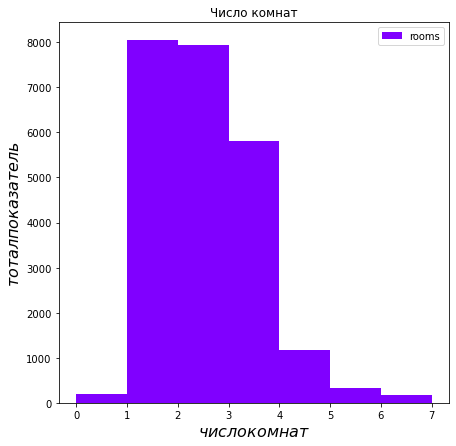

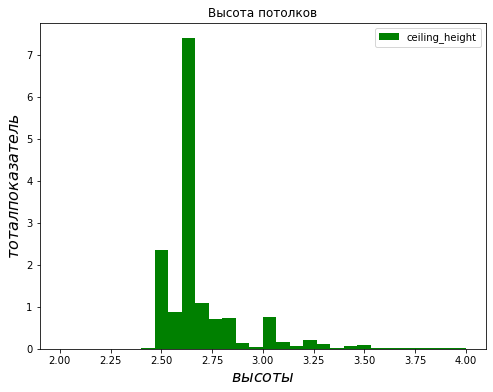

In [13]:
#Построены гистограммы для каждого параметра:
df.plot(y='total_area', kind='hist', density=True, bins=50, xlim=(0,400), figsize=(8,6), title='Общая площадь', colormap='brg')
plt.xlabel(r'$квадратура$', fontsize=16)
plt.ylabel(r'$тотал показатель$', fontsize=16)
df.plot(y='last_price', kind='hist', density=True, bins=500, xlim=(12000,50000000), figsize=(8,6), title='Цена', colormap='jet')
plt.xlabel(r'$цена продажи$', fontsize=16)
plt.ylabel(r'$тотал показатель$', fontsize=16)
df.plot(y='rooms', kind='hist', bins=7, range=(0, 7), figsize=(7,7), title='Число комнат', colormap='rainbow')
plt.xlabel(r'$число комнат$', fontsize=16)
plt.ylabel(r'$тотал показатель$', fontsize=16)
df.plot(y='ceiling_height', kind='hist', bins=30, range=(2, 4), density=True, figsize=(8,6), title='Высота потолков', colormap="ocean")
plt.xlabel(r'$высоты$', fontsize=16)
plt.ylabel(r'$тотал показатель$', fontsize=16)
plt.show()
# Визуализировав графики мы можем наблюдать следующие значения: Общая площадь пик приходится на 50м кв
# Медийная цена 4650000 
# Число комнат пик приходится на 1 комнатные квартиры,совсем немного устуавют 2кв
# Высота потолков пик прихотся на значчение 2.75м


count    20498.000000
mean       180.920041
std        219.706375
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

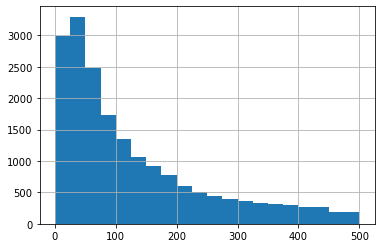

In [14]:
# Изучаем время продажи квартиры. Постройте гистограмму.
#df.plot(y='days_exposition', kind='hist', density=True, bins=70, xlim=(0,1000), figsize=(8,6), title='Дни продажи', colormap='brg')
df['days_exposition'].hist(bins=20,range=(0,500))
# Выводим среднюю и медиану
df['days_exposition'].mean()
df['days_exposition'].median()
# Медиана 95, а среднее составляет 180. Будем исходить из средней и запишем что продажа кв в среднем уходит 180 дней или пол года!
# Введем категоризацию для срока продажи, если меньше месяца 30 - быстрая продажа, свыше 180 дней долгая продажа, промежуток - оыбчная
def buy(row):
    if row['days_exposition'] <= 30:
        return 'быстрая продажа'
    if 31 <= row['days_exposition'] <= 180:
        return 'обычная продажа'
    return 'долгая продажа'
#Создаём новый столбец 
df['buy_cat'] = df.apply(buy, axis=1)
df.buy_cat.value_counts()

# из анализа можем наблюдать что быстрых продаж 3738, а долгих 9683. Из чего исходим что более долгие продажи преобладают в соотношении.

#  "Убераем редкие и выбивающиеся значения. Ищём особенности"
df['days_exposition'].describe()

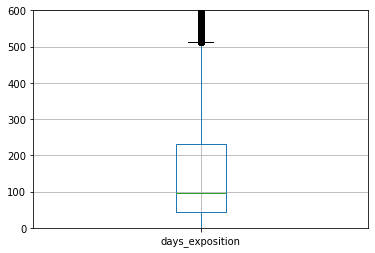

In [15]:
# По данному графику можем увидеть, что большая часть значений находится за пределами 500 дней.
plt.ylim(0,600)
df.boxplot(column='days_exposition') 
plt.show()

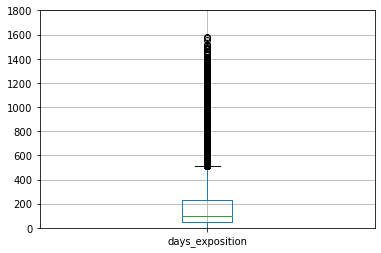

In [16]:
plt.ylim(0,1800)
df.boxplot(column='days_exposition')
plt.show()

<AxesSubplot:>

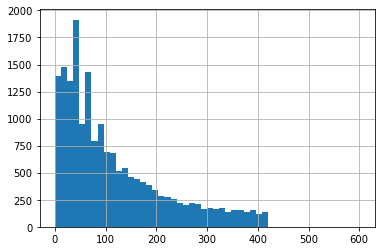

In [17]:
#Убираем выбросы находящиеся за пределами 500 дней
new_exposition=df.query('days_exposition<420')
new_exposition['days_exposition'].hist(bins=50,range=(0,600))
# Мы видим основные пики на 50,70,95 и 180 днях.

<AxesSubplot:>

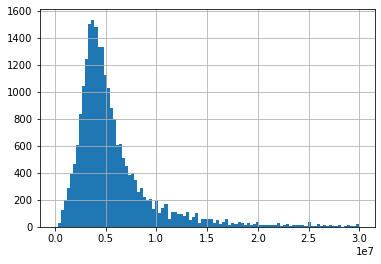

In [18]:
#Построил диаграмму размаха цены
df['last_price'].hist(bins=100,range=(0,30000000))

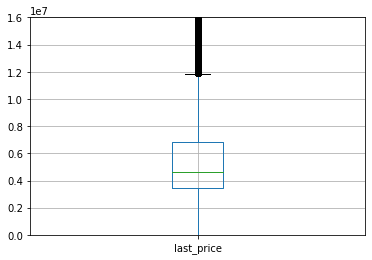

In [19]:
plt.ylim(0,16000000)
df.boxplot(column='last_price') 
plt.show()

In [20]:
#Убираем выбросы находящиеся за пределами 11.5 млн
new_exposition=df.query('last_price<11500000')

<AxesSubplot:>

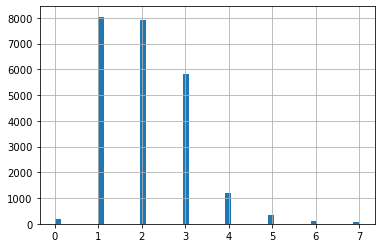

In [21]:
#Построил диаграмму размаха комнат
df['rooms'].hist(bins=50,range=(0,7))

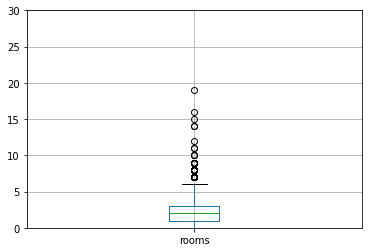

In [22]:
plt.ylim(0,30)
df.boxplot(column='rooms') 
plt.show()

In [23]:
#Убираем выбросы находящиеся за пределами 6 кв
new_exposition=df.query('rooms<= 6')

<AxesSubplot:>

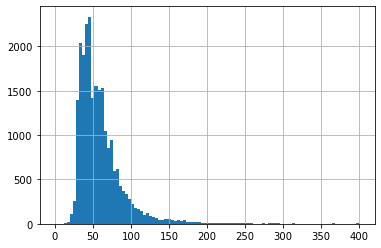

In [24]:
#Построил диаграмму размаха площади
df['total_area'].hist(bins=100,range=(0,400))

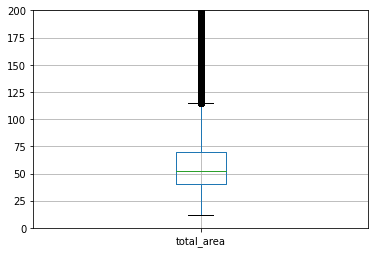

In [25]:
plt.ylim(0,200)
df.boxplot(column='total_area') 
plt.show()

In [26]:
#Убираем выбросы находящиеся за пределами 110 кв м
new_exposition=df.query('total_area<= 110')

<AxesSubplot:>

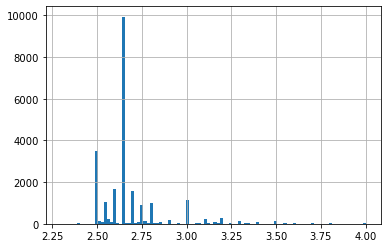

In [27]:
#Построил диаграмму размаха высоты потолка
df['ceiling_height'].hist(bins=100,range=(2.3,4))

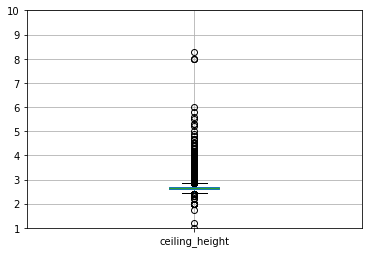

In [28]:
plt.ylim(1,10)
df.boxplot(column='ceiling_height') 
plt.show()

In [29]:
#Убираем выбросы находящиеся за пределами 2.8м
new_exposition=df.query('ceiling_height<= 2.8')

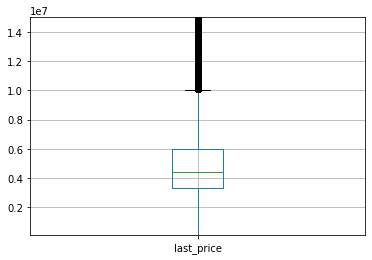

<AxesSubplot:xlabel='total_area'>

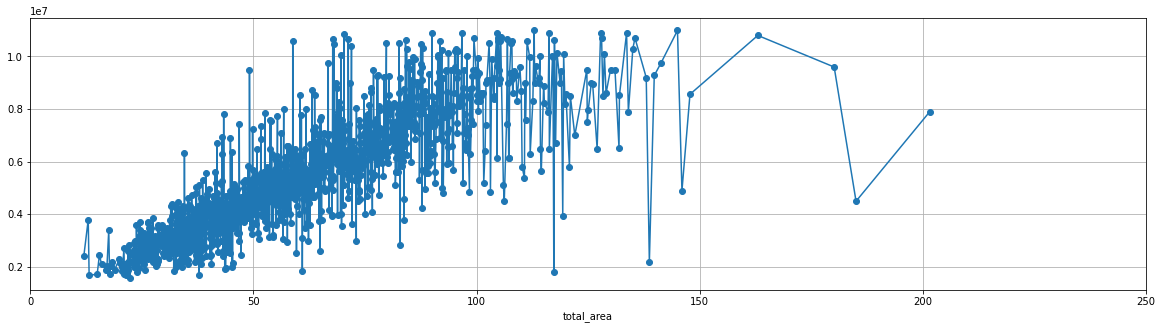

In [30]:
#Зависит ли цена от квадратного метра
new_exposition['total_area'].describe()
plt.ylim(100000,15000000)
new_exposition.boxplot(column='last_price')
plt.show()
#Уберём выбросы
new_exposition=new_exposition.query('1500000<last_price<11000000')
(new_exposition
 .groupby('total_area')['last_price'].median()
 .plot(x='total_area', y='last_price', style='o-', xlim=(0, 250), grid=True, figsize=(20, 5))
      )

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

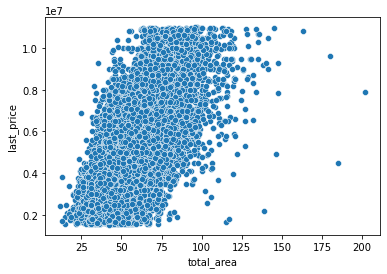

In [31]:
seaborn.scatterplot(x=new_exposition['total_area'],y =new_exposition['last_price'])

<font size="5"><b>Ответ:</b></font>
Сделал ещё с помощью scatterplot

In [32]:
new_exposition['last_price'].corr(new_exposition['total_area'])

0.6768121313946864

In [33]:
# Из данного анализа можем наблюдать как с увеличением квадратуры растёт и цена, что и даказывает показател корреляци Пирсона 0.68

<AxesSubplot:xlabel='rooms'>

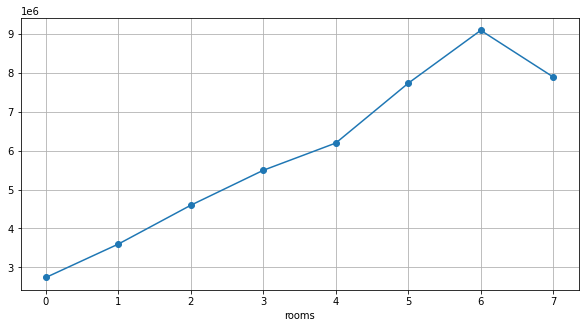

In [34]:
#Зависит ли цена от Кол-ва квартир
(new_exposition
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(10,5),alpha=1)
)

In [35]:
new_exposition['rooms'].corr(new_exposition['last_price'])

0.4331211630742498

In [36]:
# Из данного анализа можем наблюдать как с увеличением кол-ва комнат растёт и цена, что и даказывает показател корреляци Пирсона 0.45

<AxesSubplot:xlabel='floor_category'>

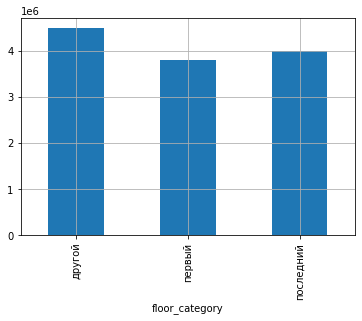

In [37]:
#Зависит ли цена от этажа
new_exposition.groupby('floor_category')['last_price'].median().plot(x='floor_category', y='last_price', kind='bar',grid=True)

In [38]:
new_exposition['last_price'].corr(new_exposition['floor'])

0.16036192054229137

In [39]:
# Из данного анализа можем наблюдать что этаж не сильно влияет на рост и цена, что и даказывает показатель корреляци Пирсона 0.1

<AxesSubplot:xlabel='cityCenters_nearest'>

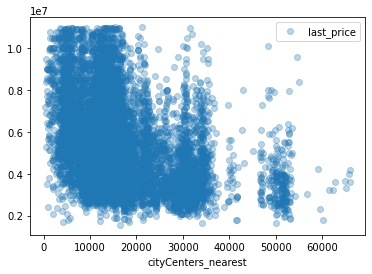

In [40]:
#Зависит ли цена от растояния до центра города
(new_exposition
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

In [41]:
new_exposition['cityCenters_nearest'].corr(new_exposition['last_price'])

-0.29530552554828016

In [42]:
# Сильный разброс, но есть плотность, которые показывают, что при увеличении расстояния, стоимость уменьшается не сильно. Об этом говорить и коэф Пирсона. Он отрицательный=- 0.17

<AxesSubplot:xlabel='week_day'>

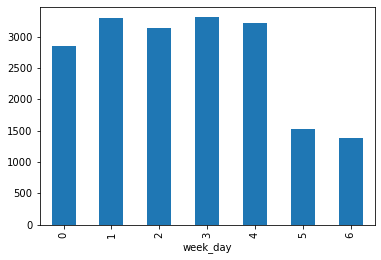

In [43]:
(new_exposition
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',kind='bar')
)

Лучше всего себя проявлют вторник четверг и пятница в сравнении с выходными

<AxesSubplot:xlabel='month'>

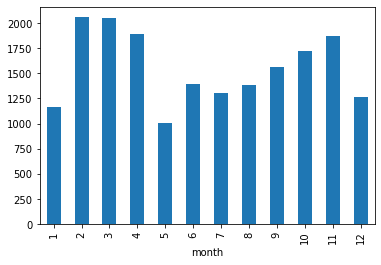

In [44]:
(new_exposition
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

Лучшие месяцы это февраль,март,апрель. к лету идёт спад, но к новому году обороты возрастают. Январь упадок из-за праздников

<AxesSubplot:xlabel='year'>

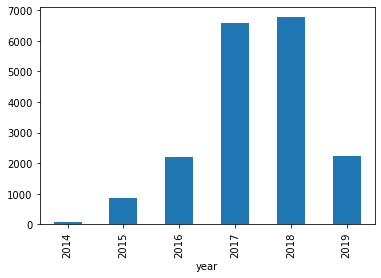

In [45]:
(new_exposition
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

2018 Показывает лучший результат

In [46]:
#"Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах
raiting_of_location=new_exposition.pivot_table(index='locality_name',values='one_m_price',aggfunc=('count','median'))
raiting_of_location = raiting_of_location.sort_values(by='count',ascending=False).head(10)
raiting_of_location

,count,median
locality_name,,
Санкт-Петербург,11855.0,101098.0
посёлок Мурино,512.0,85697.0
посёлок Шушары,435.0,76666.0
Всеволожск,376.0,65789.0
посёлок Парголово,324.0,91779.5
Колпино,316.0,74729.0
Пушкин,300.0,97988.5
деревня Кудрово,295.0,92000.0
Гатчина,279.0,67796.0


<AxesSubplot:xlabel='locality_name'>

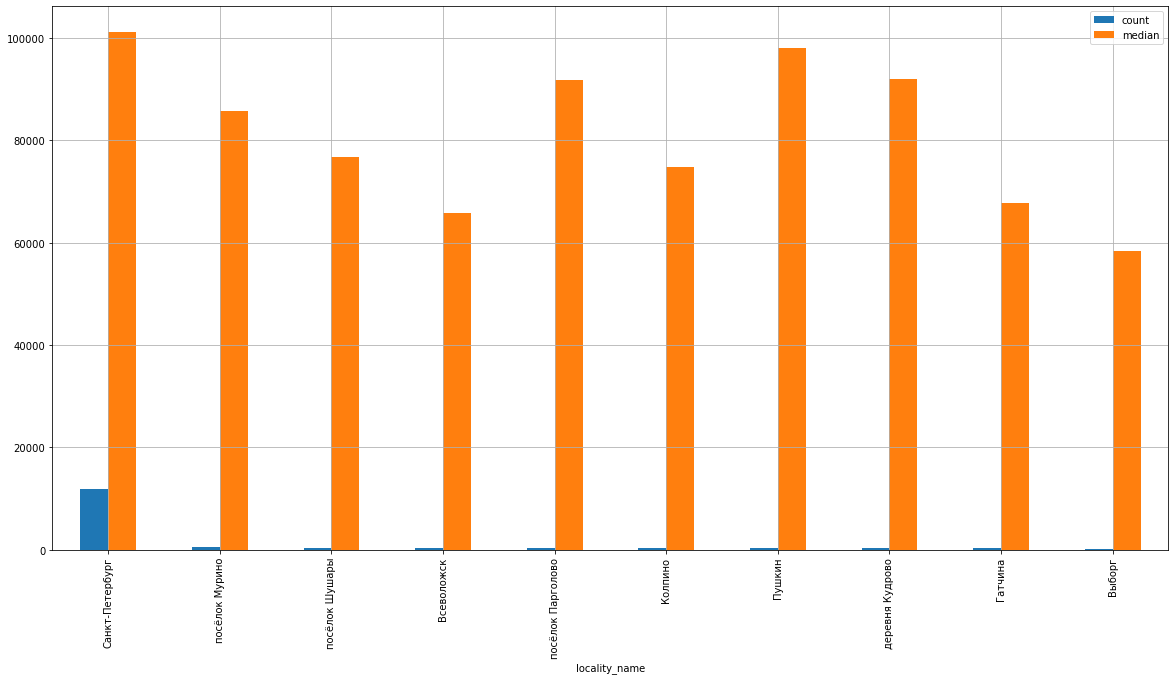

In [47]:
raiting_of_location.plot(kind= 'bar',figsize = (20,10), grid=True)

In [48]:
# Переведём ростоние до центра из метров в км.
new_exposition['cityCenters_nearest_km'] = (new_exposition['cityCenters_nearest'] / 1000)
# Просчитаем среднюю цену
new_exposition['price_centers'] = new_exposition['last_price'] / new_exposition['cityCenters_nearest_km']


<AxesSubplot:xlabel='cityCenters_nearest_km'>

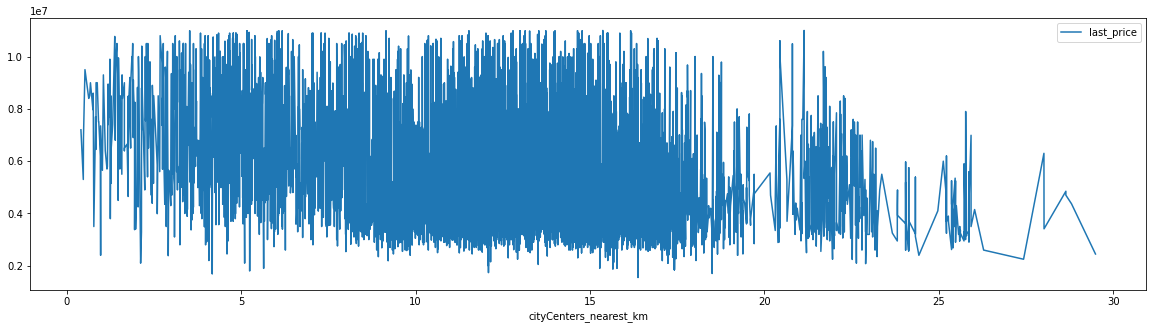

In [49]:
#Создаём срез
spb=new_exposition.query('locality_name=="Санкт-Петербург"')
#Строим график
(spb
     .sort_values(by='cityCenters_nearest_km',ascending=True)
     .plot(x='cityCenters_nearest_km',y='last_price', style='-',figsize=(20,5))
)


In [50]:
# Код ревьюера
new_exposition['cityCenters_nearest_km'] = round(new_exposition['cityCenters_nearest'] / 1000)

new_exposition['price_centers'] = new_exposition.groupby('cityCenters_nearest_km')['last_price'].transform('median')

<AxesSubplot:xlabel='cityCenters_nearest_km'>

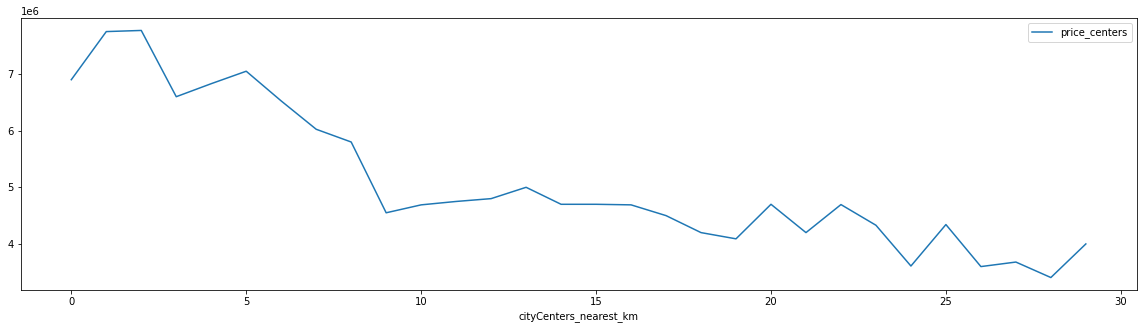

In [51]:
# Код ревьюера
spb=new_exposition.query('locality_name=="Санкт-Петербург"')

(spb
     .sort_values(by='cityCenters_nearest_km',ascending=True)
     .plot(x='cityCenters_nearest_km',y='price_centers', style='-',figsize=(20,5))
)

In [52]:
#выводим границу в 5 км
spb=spb.query('cityCenters_nearest_km < 5')
len(spb)
#1092 штук в центре 

455

<AxesSubplot:>

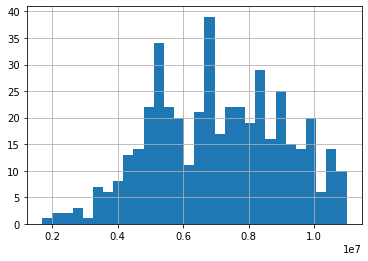

In [53]:
# Делаем срез по центру spb
spb_top=new_exposition.query('cityCenters_nearest_km < 5 and locality_name == "Санкт-Петербург"')
spb_top['last_price'].hist(bins=30)
#Больше всего квартир за 7 млн.

<AxesSubplot:>

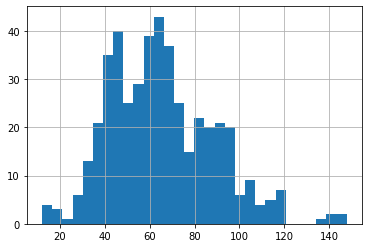

In [54]:
spb_top['total_area'].hist(bins=30)
# С площадью 65-70 кв м

<AxesSubplot:>

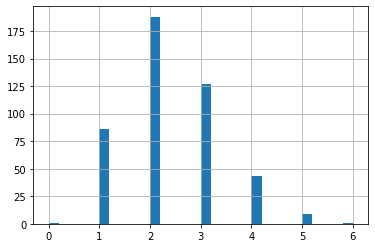

In [55]:
spb_top['rooms'].hist(bins=30)
# Двухкомнатных квартир

<AxesSubplot:>

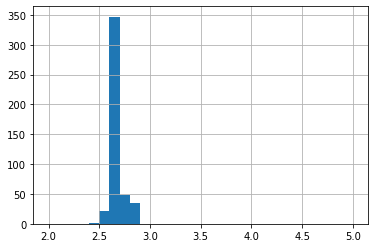

In [56]:
spb_top['ceiling_height'].hist(bins=30,range=(2,5))
# С высотой потолка 2,6 м

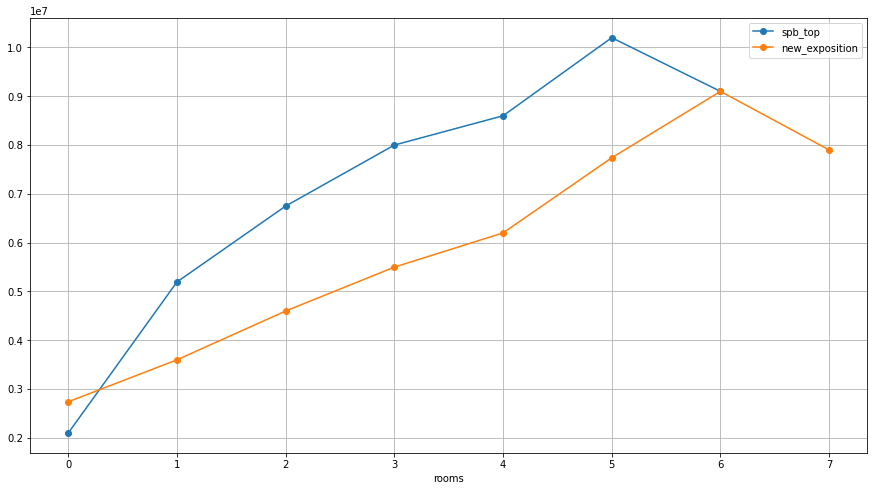

In [57]:
(spb_top
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True,label='spb_top')
)


(new_exposition
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True,label='new_exposition')
)
plt.legend()
plt.show()


In [58]:
# Голубой линией определены квартиры в центре,самые дорогие 5-комнатные . Оранжевыем выделены все кв,они уступаю в ценовом сегменте.

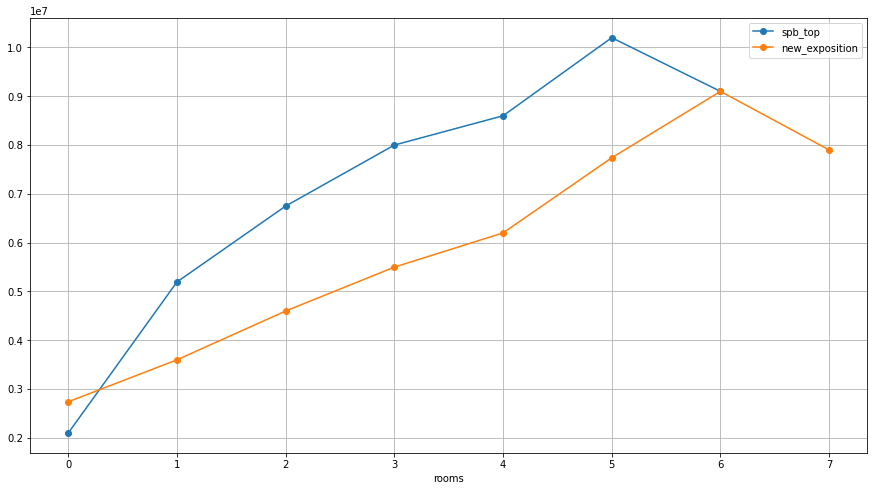

In [59]:
# Код ревьюера
(spb_top
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),label='spb_top')
)



(new_exposition
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),label='new_exposition')
)
plt.legend()
plt.show()


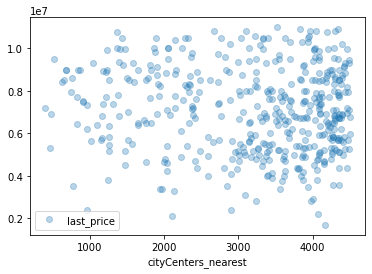

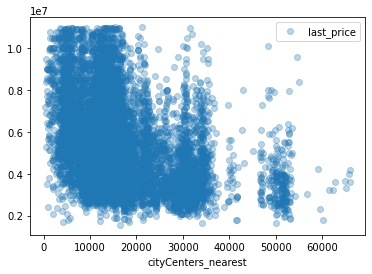

In [60]:
(spb_top
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

(new_exposition
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

plt.show()

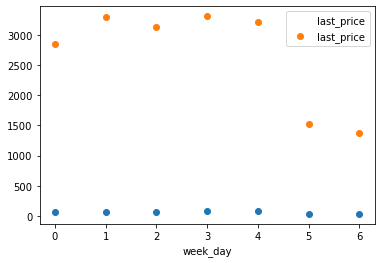

In [61]:
(spb_top
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

(new_exposition
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

plt.show()

In [62]:
spb_top['week_day'].corr(spb_top['last_price'])

-0.031853660876092475

In [63]:
new_exposition['week_day'].corr(new_exposition['last_price'])
## В обоих случаях низкая корреляция, показатели не сильно взаиимосвязаны

0.0033171022898022783

Продажи в течение недели особо не меняются.В обоих случах на выходных идёт спад

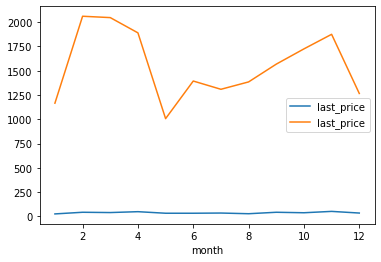

In [64]:
(spb_top
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)
(new_exposition
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)

plt.show()

In [65]:
spb_top['month'].corr(spb_top['last_price'])

-0.031061945467035407

In [66]:
new_exposition['month'].corr(new_exposition['last_price'])
## В обоих случаях отрицательная корреляции, показатели не сильно взаиимосвязаны

0.002879079971744225

Продажи в течение года особо не меняются.В обоих примерно одинаково.

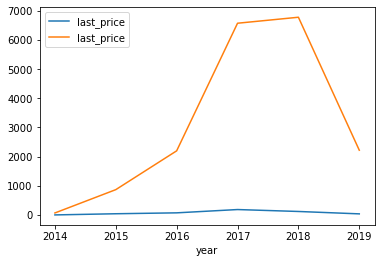

In [67]:
(spb_top
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)
(new_exposition
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)

plt.show()


In [68]:
spb_top['year'].corr(spb_top['last_price'])

0.004425376157432148

In [69]:
new_exposition['year'].corr(new_exposition['last_price'])
# В обоих случаях положительные корреляции, что подтверждает взаимосвязь

0.01849829737074997

По графику можно сказать, что в 2018 году был подъем продаж.

## Общий вывод

1.На первом шаге при знакомстве с датасетом были обнаружены множественные пропуски, а также много аномалий, от которых мы в последствии успешно избавились.
2.На втором этапе для пропущенных значений этажности и высоты потолков домов были восстановлены значения по доступным данным из датасета. Заполнены другие пропущенные значения. Изменены типы данных, обработаны выбросы и аномальные значения.
Так же посчитаны и доюавлены а таблицу:
а)Цена квадратного метра;
б)День недели, месяц и год публикации объявления;
в)Этаж квартиры; варианты — первый, последний, другой;
г)Соотношение жилой и общей площади, а также отношение площади кухни к общей.

Если обобщить все данные, то можно сделать вывод, что больше всего квартир продается в будние дни,1-3 комнатные квартиры, на любом, кроме первого этажа, с высотой потолка 2,75 м за цену около 5-6 млн. руб. Увидели, что цена кв. зависет от этажа, района, от высоты потолка и от кол-ва комнат. Корреляция этих параметров в центре похоже и для всех квартир.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод